## 회귀분석 - 평균으로 돌아가다 

In [1]:
# 보스턴 집값 데이터로 분석 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import koreanize_matplotlib 
import seaborn as sns 

In [6]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/01%EB%B3%B4%EC%8A%A4%ED%84%B4%EC%A7%91%EA%B0%92%EB%8D%B0%EC%9D%B4%ED%84%B0.csv",encoding="utf-8")

In [7]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   범죄율           506 non-null    float64
 1   25,000평방피트초과  506 non-null    float64
 2   비소매상업지역비율     506 non-null    float64
 3   찰스강경계         506 non-null    int64  
 4   농축 일산화질소      506 non-null    float64
 5   가구당평균방수       506 non-null    float64
 6   1940년이전건축비율   506 non-null    float64
 7   직업센터접근성       506 non-null    float64
 8   도로접근성         506 non-null    int64  
 9   재산세율          506 non-null    float64
 10  학생/교사비율       506 non-null    float64
 11  흑인비율          506 non-null    float64
 12  하위계층비율        506 non-null    float64
 13  주택가격          506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.corr(method='pearson')

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
범죄율,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
"25,000평방피트초과",-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
비소매상업지역비율,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
찰스강경계,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
농축 일산화질소,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
가구당평균방수,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
1940년이전건축비율,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
직업센터접근성,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
도로접근성,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
재산세율,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<Axes: >

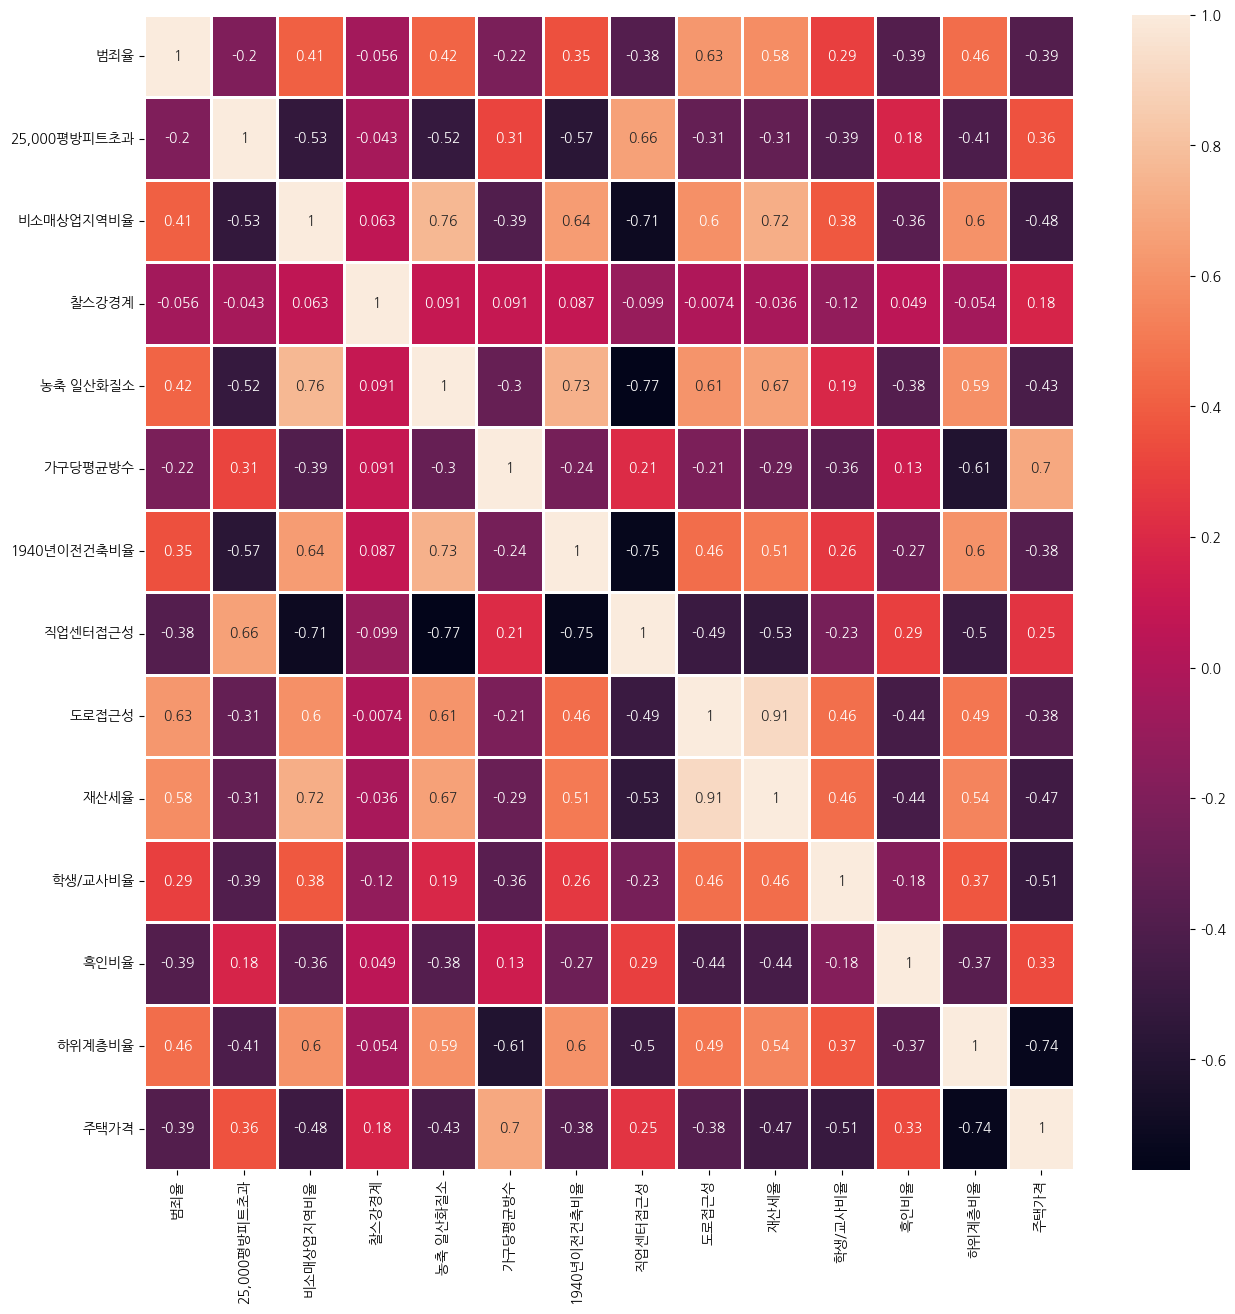

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,linecolor='white',linewidths=1)

<Axes: xlabel='하위계층비율', ylabel='주택가격'>

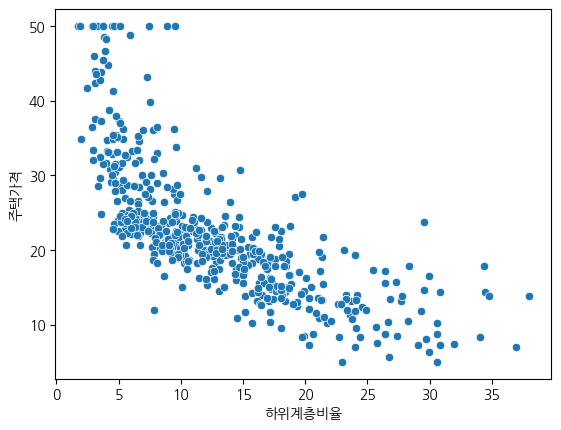

In [19]:
sns.scatterplot(data=data['주택가격'],x=data["하위계층비율"],y=data["주택가격"])

In [20]:
data.columns

Index(['범죄율', '25,000평방피트초과', '비소매상업지역비율', '찰스강경계', '농축 일산화질소', '가구당평균방수',
       '1940년이전건축비율', '직업센터접근성', '도로접근성', '재산세율', '학생/교사비율', '흑인비율', '하위계층비율',
       '주택가격'],
      dtype='object')

<Axes: xlabel='1940년이전건축비율', ylabel='농축 일산화질소'>

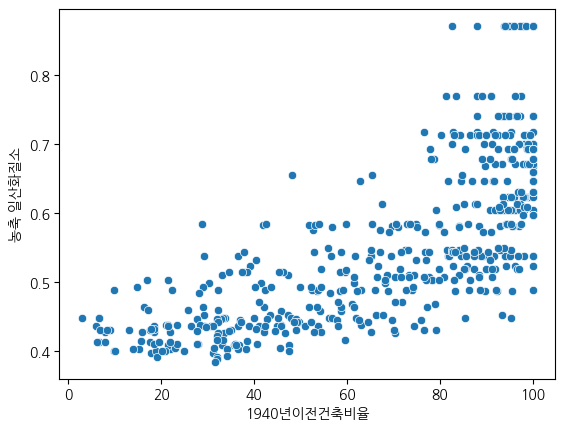

In [24]:
sns.scatterplot(data=data['농축 일산화질소'],x=data['1940년이전건축비율'],y=data['농축 일산화질소'])

<Axes: xlabel='직업센터접근성', ylabel='농축 일산화질소'>

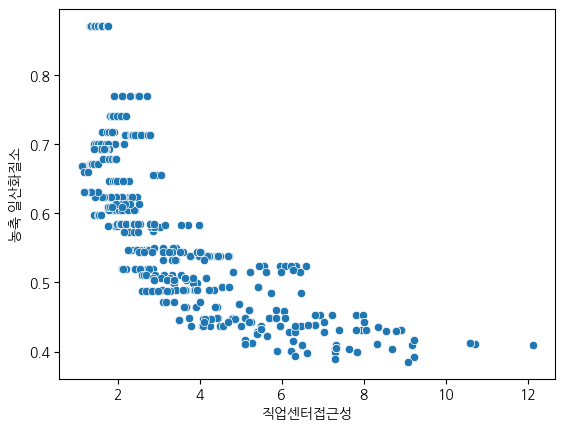

In [25]:
sns.scatterplot(data=data['농축 일산화질소'],x=data['직업센터접근성'],y=data['농축 일산화질소'])

## 전체적인 그래프 그리기

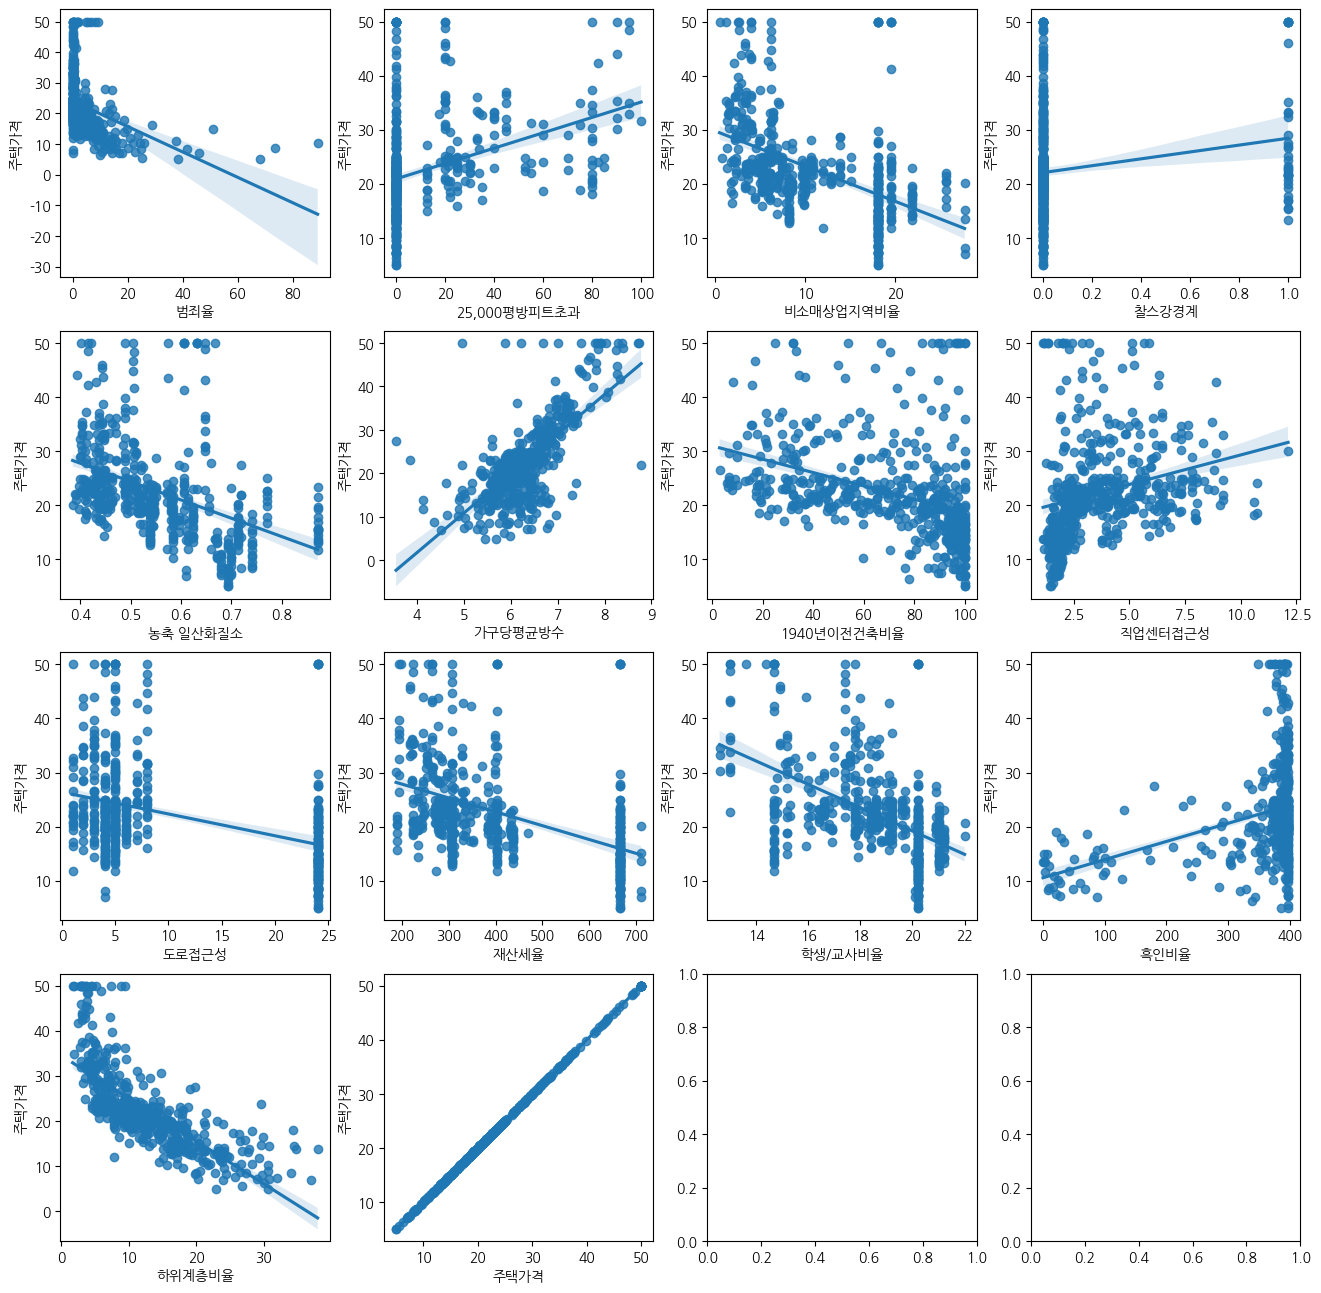

In [27]:
# 주택 가격에 대한 각 독립변수의 산포도 그래프

fig,axs = plt.subplots(figsize=(16,16),ncols=4,nrows=4)
for i,feature in enumerate(data):
    row = int(i/4)
    col = i%4 
    sns.regplot(data=data, x=feature,y='주택가격',ax=axs[row][col])

## 각각의 값들 중 boxplot으로 확인

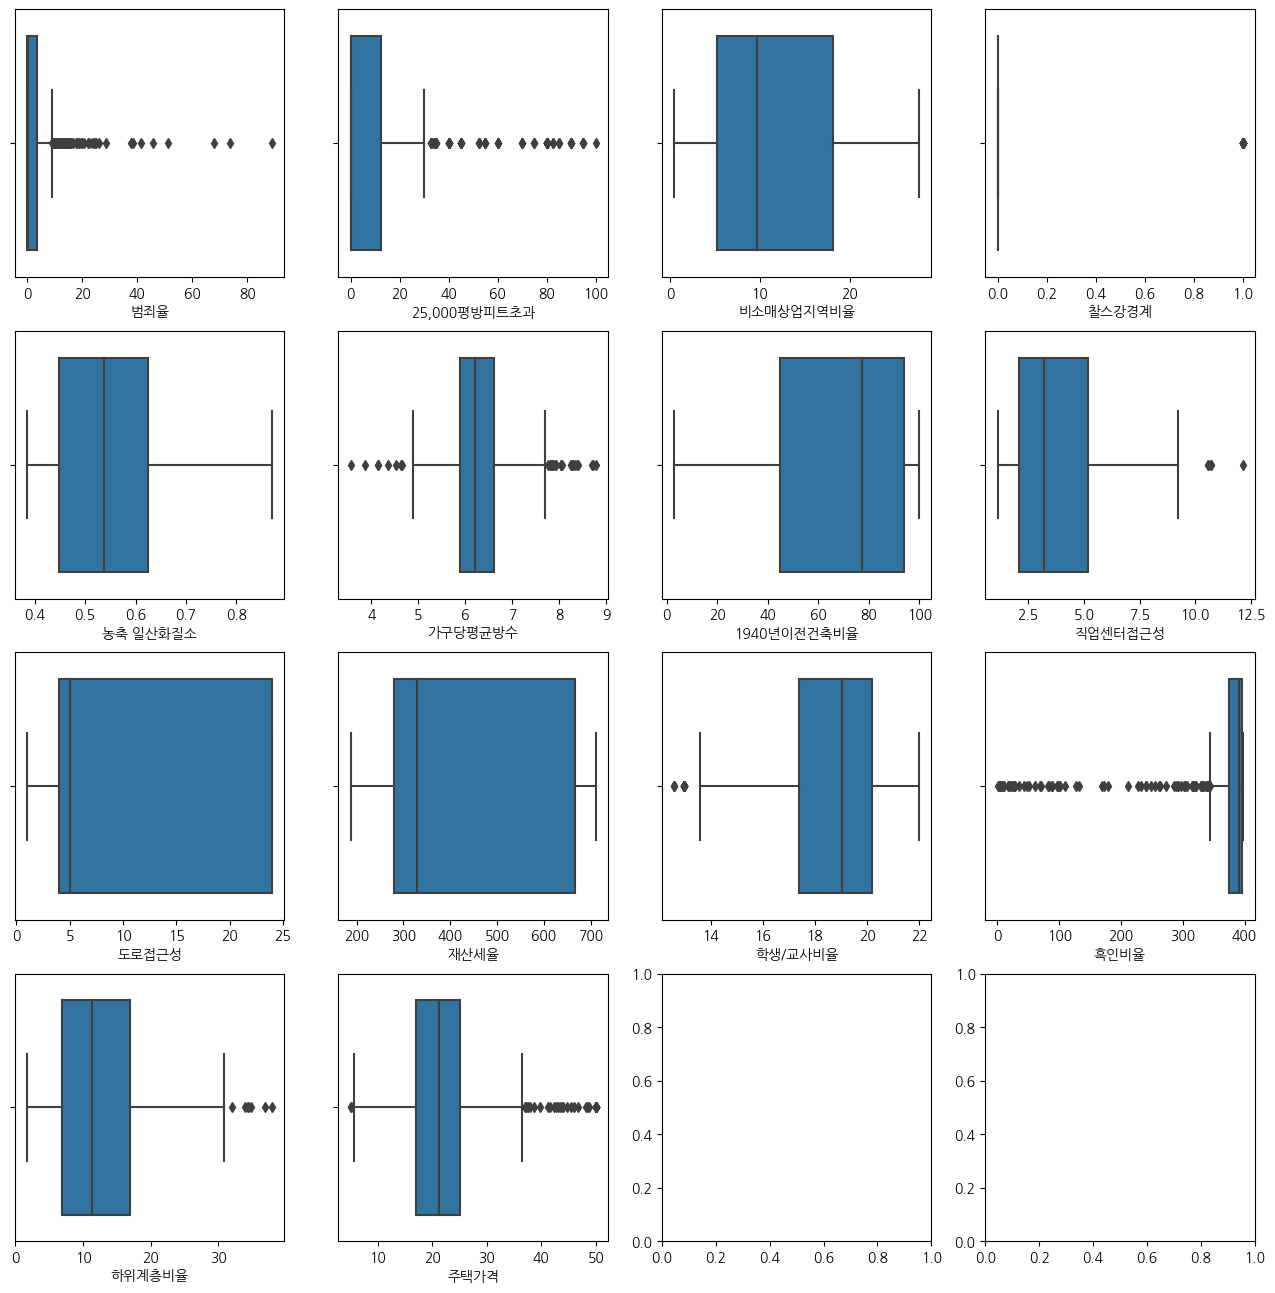

In [28]:
fig,axs = plt.subplots(figsize=(16,16),ncols=4,nrows=4)
for i,feature in enumerate(data):
    row = int(i/4)
    col = i%4 
    sns.boxplot(x=data[feature],ax=axs[row][col])

## 독립변수에 이상치가 많은 컬럼이 많으므로 로버스트 스케일러를 이용해서 스케일링을 해준다 

In [31]:
from sklearn.preprocessing import RobustScaler

In [32]:
data.head()

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율,주택가격
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [33]:
X = data.drop('주택가격',axis=1)
y = data["주택가격"]

In [93]:
rs=RobustScaler() 
X_scaled = rs.fit_transform(X)


In [94]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [95]:
X_scaled

,범죄율,"25,000평방피트초과",비소매상업지역비율,찰스강경계,농축 일산화질소,가구당평균방수,1940년이전건축비율,직업센터접근성,도로접근성,재산세율,학생/교사비율,흑인비율,하위계층비율
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


## 홀드아웃 

In [39]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=7)

## 회귀분석 싸이킷런 버전 

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt 

In [69]:
lr = LinearRegression() 
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print("coef:",lr.coef_)
print()
print('intercept',lr.intercept_)
print()
print("MSE:",mean_squared_error(y_test,pred))
print()
print("RMSE",sqrt(mean_squared_error(y_test,pred)))
print()
print('R-squared:',r2_score(y_test,pred))

coef: [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]

intercept 22.907793401549334

MSE: 34.05648134887461

RMSE 5.835793120808397

R-squared: 0.5785415472763409


In [57]:
len(pred)

102

In [59]:
len(y_test)

102

In [72]:
y_test

357    21.7
337    18.5
327    22.2
13     20.4
418     8.8
       ... 
413    16.3
408    17.2
80     28.0
451    15.2
26     16.6
Name: 주택가격, Length: 102, dtype: float64

In [71]:
X_test

array([[ 0.9994861 ,  0.        ,  0.651433  , ...,  0.41071429,
        -0.00479674,  0.19090455],
       [-0.06289225,  0.        , -0.348567  , ...,  0.41071429,
         0.16165008, -0.07996002],
       [-0.00430594,  0.        , -0.17893106, ...,  0.19642857,
         0.26190191,  0.14292854],
       ...,
       [-0.05991036,  2.        , -0.37412858, ..., -0.01785714,
         0.26190191, -0.60669665],
       [ 1.44216298,  0.        ,  0.651433  , ...,  0.41071429,
        -1.73402087,  0.63668166],
       [ 0.11554817,  0.        , -0.12006197, ...,  0.69642857,
        -0.69840508,  0.34482759]])

In [73]:
y_np_test = y_test.values

ValueError: x and y must be the same size

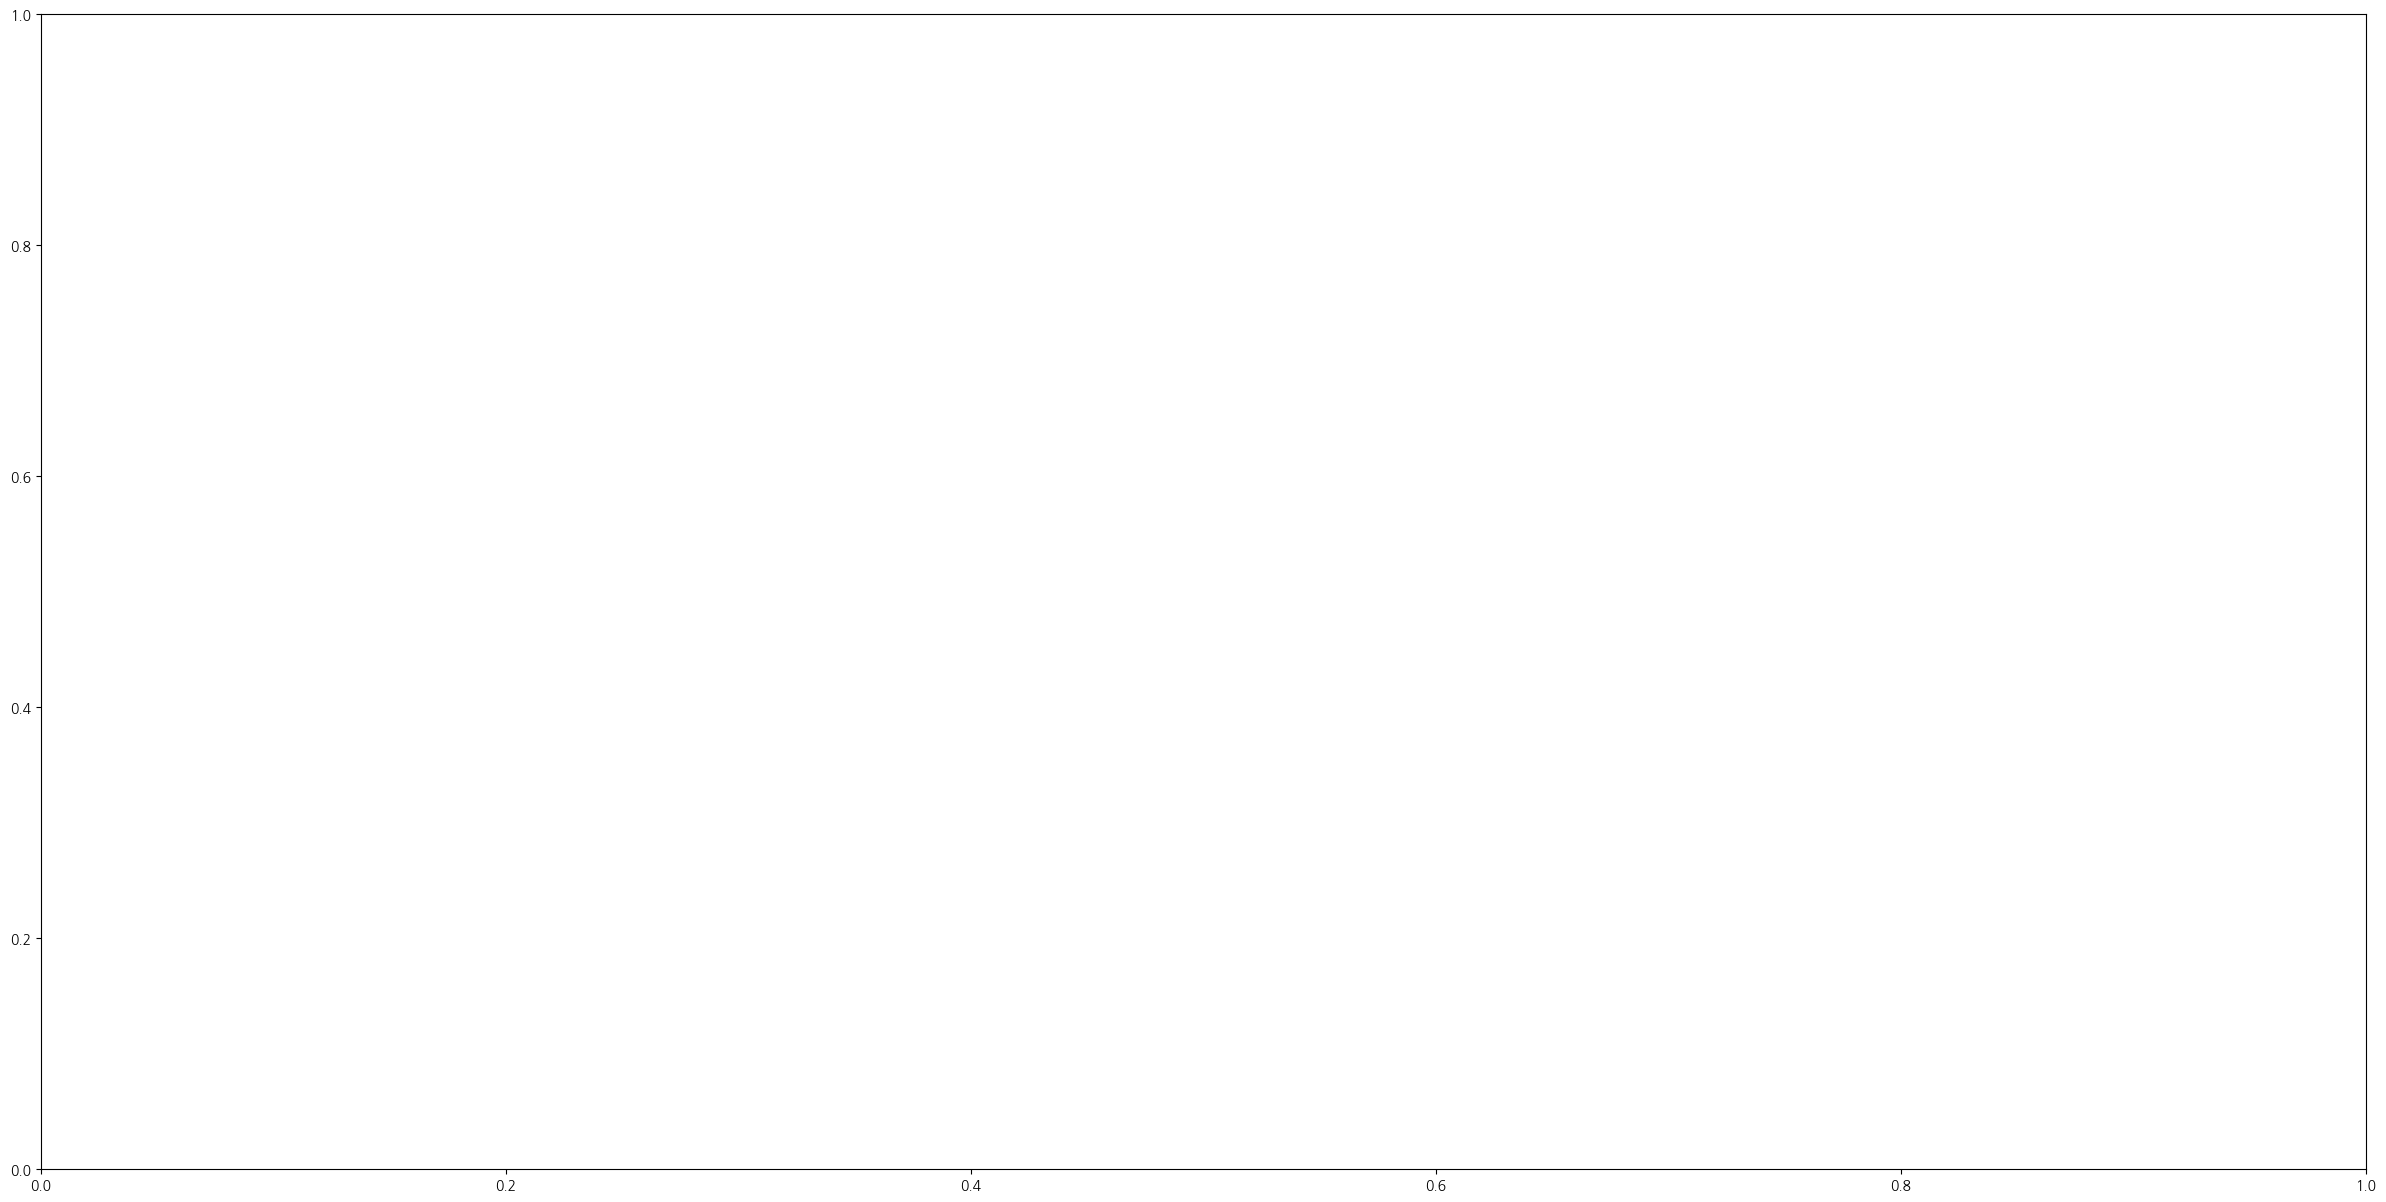

In [78]:
plt.figure(figsize=(30,15))
plt.scatter(X_test,y_np_test,color='black')
plt.plot(X_test,pred,color='blue',linewidths=3)
plt.show()

In [81]:
result = pd.DataFrame({'실제값':y_test,'예측값':pred})
result

,실제값,예측값
357,21.7,23.016076
337,18.5,19.175452
327,22.2,19.931333
13,20.4,19.192223
418,8.8,4.733661
...,...,...
413,16.3,9.805358
408,17.2,13.675562
80,28.0,28.487892
451,15.2,20.270360


## statsmodels 버전 회귀분석

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [97]:
ols = sm.OLS(y_train,X_train) # 반대로한다 
model = ols.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.619
Model:                            OLS   Adj. R-squared (uncentered):              0.606
Method:                 Least Squares   F-statistic:                              48.84
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    1.37e-73
Time:                        17:29:24   Log-Likelihood:                         -1668.1
No. Observations:                 404   AIC:                                      3362.
Df Residuals:                     391   BIC:                                      3414.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [100]:
# 유의수준이 낮은 애들부터 삭제 
X_scaled2 = X_scaled.drop(["흑인비율","농축 일산화질소","재산세율","범죄율"],axis=1)


In [101]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X_scaled2,y,test_size=0.2,random_state=7)

In [102]:
ols = sm.OLS(y_train2,X_train2) # 반대로한다 
model = ols.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   주택가격   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.609
Method:                 Least Squares   F-statistic:                              70.92
Date:                Thu, 19 Oct 2023   Prob (F-statistic):                    6.01e-77
Time:                        17:33:57   Log-Likelihood:                         -1668.7
No. Observations:                 404   AIC:                                      3355.
Df Residuals:                     395   BIC:                                      3391.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## 더빈왓슨 통계값 
* 통계 값이 2면 상관 관계 없고 0양의 상관관계 , 4에 가까우면 음의상관관계(시계열로 분석해야함) 

In [108]:
X_with_const = sm.add_constant(X_train2)
ols = sm.OLS(y_train2, X_with_const)
model = ols.fit()

# 모델 요약 정보 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   주택가격   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     124.8
Date:                Thu, 19 Oct 2023   Prob (F-statistic):          1.48e-109
Time:                        17:41:02   Log-Likelihood:                -1199.1
No. Observations:                 404   AIC:                             2418.
Df Residuals:                     394   BIC:                             2458.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.7196      0.377     60.284   

## 릿지 회귀분석(Ridge Regression)
* L2규제 , w(가중치)의 절대값이 가능한 한 작게 만들어서 0에 가깝게 만든다.
* 삭제를 하는 것이 아님 , 모든 특성(Feature,독립변수)이 주는 영향력을 최소화
* 변수가 적을 때 과소적합을 막기 위해 보통 많이 사용 

In [109]:
from sklearn.linear_model import Ridge,Lasso

In [114]:
ridge = Ridge()
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
print("coef:",ridge.coef_)
print()
print('intercept',ridge.intercept_)
print()
print("MSE:",mean_squared_error(y_test,ridge_pred))
print()
print("RMSE",sqrt(mean_squared_error(y_test,ridge_pred)))
print()
print('R-squared:',r2_score(y_test,ridge_pred))
print()
print(f"{alpha} 훈련세트 점수 : {ridge.score(X_train,y_train)}")
print(f"{alpha} 테스트 세트 점수 : {ridge.score(X_test,y_test)}")

coef: [-0.43695105  0.36204928  0.1102694   2.76112827 -2.55323409  3.92371235
 -0.55838402 -3.86042291  4.61349395 -3.77318081 -2.53778791  0.21172457
 -3.86189886]

intercept 22.928047961074952

MSE: 34.29618318798121

RMSE 5.8562943221785915

R-squared: 0.575575170180892

100 훈련세트 점수 : 0.7696625597813367
100 테스트 세트 점수 : 0.575575170180892


## 하이퍼파라미터 튜닝 
* 규제 강도 조절 

In [116]:
for alpha in [0,0.1,1,10,100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    ridge_pred = ridge.predict(X_test)
    print(f"alpha: {alpha}")
    print("-"*50)
    print("coef:",ridge.coef_)
    print()
    print('intercept',ridge.intercept_)
    print()
    print("MSE:",mean_squared_error(y_test,ridge_pred))
    print()
    print("RMSE",sqrt(mean_squared_error(y_test,ridge_pred)))
    print()
    print('R-squared:',r2_score(y_test,ridge_pred))
    print(f"{alpha} 훈련세트 점수 : {ridge.score(X_train,y_train)}")
    print(f"{alpha} 테스트 세트 점수 : {ridge.score(X_test,y_test)}")
    print()

alpha: 0
--------------------------------------------------
coef: [-0.44811816  0.38091882  0.28142521  2.79225761 -2.66236681  3.89109958
 -0.54238383 -3.93198683  5.31609421 -4.45216524 -2.57479921  0.21186124
 -3.899069  ]

intercept 22.90779340154933

MSE: 34.05648134887465

RMSE 5.8357931208084

R-squared: 0.5785415472763403
0 훈련세트 점수 : 0.7698532963729757
0 테스트 세트 점수 : 0.5785415472763403

alpha: 0.1
--------------------------------------------------
coef: [-0.44684005  0.37879135  0.26137353  2.79008099 -2.65073915  3.89473775
 -0.5443916  -3.92491877  5.23541364 -4.37326459 -2.57073537  0.21182976
 -3.89512865]

intercept 22.9101125154965

MSE: 34.081827791997796

RMSE 5.837964353436718

R-squared: 0.5782278779752961
0.1 훈련세트 점수 : 0.7698508329309773
0.1 테스트 세트 점수 : 0.5782278779752961

alpha: 1
--------------------------------------------------
coef: [-0.43695105  0.36204928  0.1102694   2.76112827 -2.55323409  3.92371235
 -0.55838402 -3.86042291  4.61349395 -3.77318081 -2.5377879

## 라쏘 회귀분석 
* L1 규제 , w(가중치)의 절대값에 패널티를 부여하여, 0으로 만들고 제거해버림 
* 특성(feature,독립변수)이 너무 많을 때, 유용함 
* 의미 있는 변수만 분석에 포함시키고 싶을 때 효과적인 방법 

In [119]:
lasso = Lasso() 
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
print("coef:",lasso.coef_)
print()
print('intercept',lasso.intercept_)
print()
print("MSE:",mean_squared_error(y_test,lasso_pred))
print()
print("RMSE",sqrt(mean_squared_error(y_test,lasso_pred)))
print()
print('R-squared:',r2_score(y_test,lasso_pred))
print()
print(f"{alpha} 훈련세트 점수 : {lasso.score(X_train,y_train)}")
print(f"{alpha} 테스트 세트 점수 : {lasso.score(X_test,y_test)}")

coef: [-0.44924038  0.01910541 -0.          0.         -0.          4.49033756
 -0.         -0.         -0.         -0.         -1.08680653  0.2917393
 -1.94742591]

intercept 22.98810486022828

MSE: 45.22996794500432

RMSE 6.72532288778794

R-squared: 0.44026653512541625

100 훈련세트 점수 : 0.6928716917521303
100 테스트 세트 점수 : 0.44026653512541625


## 엘라스틱넷 회귀분석
* 라쏘와 릿지의 장점을 모두 가지고 있음 

In [120]:
from sklearn.linear_model import ElasticNet

In [122]:
ela = ElasticNet()
ela.fit(X_train,y_train)
ela_pred = ela.predict(X_test)

print("coef:",ela.coef_)
print()
print('intercept',ela.intercept_)
print()
print("MSE:",mean_squared_error(y_test,ela_pred))
print()
print("RMSE",sqrt(mean_squared_error(y_test,ela_pred)))
print()
print('R-squared:',r2_score(y_test,ela_pred))
print()
print(f"{alpha} 훈련세트 점수 : {ela.score(X_train,y_train)}")
print(f"{alpha} 테스트 세트 점수 : {ela.score(X_test,y_test)}")

coef: [-0.56280634  0.30242972 -0.02071502  0.         -0.03168404  3.12921805
 -0.         -0.         -0.         -0.         -1.19226235  0.31400883
 -1.77231844]

intercept 22.93406535779871

MSE: 42.89934748180562

RMSE 6.549759345335187

R-squared: 0.4691086132086908

100 훈련세트 점수 : 0.6505728229705883
100 테스트 세트 점수 : 0.4691086132086908
